In [1]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Pima Diabetes Dataset
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
#Initialize X matrix, y targets. Train test split + Scaling X matricies
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [38]:
#KNN

train_results = []
test_results = []
for k in range(0, 300, 5):
  if k == 0:
    continue
  # Initializing and fitting the KNN classifier
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train_scaled, y_train)

  # Making predictions
  train_y_pred = knn.predict(X_train_scaled)
  test_y_pred = knn.predict(X_test_scaled)

  # Calculating the number of correct predictions
  test_error = 1 - np.mean(test_y_pred == y_test)
  test_results.append((k, test_error))

  train_error = 1 - np.mean(train_y_pred == y_train)
  train_results.append((k, train_error))
  print((k, np.round(train_error, 4), np.round(test_error, 4)))

(5, 0.1759, 0.3052)
(10, 0.2101, 0.3117)
(15, 0.2085, 0.2792)
(20, 0.2313, 0.2403)
(25, 0.2215, 0.2597)
(30, 0.2296, 0.2468)
(35, 0.2215, 0.2468)
(40, 0.2362, 0.2403)
(45, 0.2394, 0.2403)
(50, 0.2362, 0.2338)
(55, 0.2443, 0.2403)
(60, 0.2492, 0.2403)
(65, 0.2524, 0.2403)
(70, 0.2622, 0.2338)
(75, 0.2557, 0.2338)
(80, 0.259, 0.2468)
(85, 0.2606, 0.2468)
(90, 0.2671, 0.2208)
(95, 0.2638, 0.2208)
(100, 0.2671, 0.2273)
(105, 0.2671, 0.2338)
(110, 0.2655, 0.2273)
(115, 0.2736, 0.2338)
(120, 0.2769, 0.2597)
(125, 0.2818, 0.2468)
(130, 0.2818, 0.2727)
(135, 0.2801, 0.2662)
(140, 0.2818, 0.2857)
(145, 0.2834, 0.2987)
(150, 0.2883, 0.2922)
(155, 0.2866, 0.2987)
(160, 0.2899, 0.3052)
(165, 0.2948, 0.2987)
(170, 0.3046, 0.2987)
(175, 0.298, 0.2987)
(180, 0.3029, 0.2987)
(185, 0.3046, 0.2922)
(190, 0.3062, 0.3052)
(195, 0.3029, 0.2987)
(200, 0.3062, 0.2987)
(205, 0.3062, 0.2987)
(210, 0.3143, 0.2987)
(215, 0.316, 0.2987)
(220, 0.3192, 0.2987)
(225, 0.3192, 0.3182)
(230, 0.3192, 0.3377)
(235, 0.319

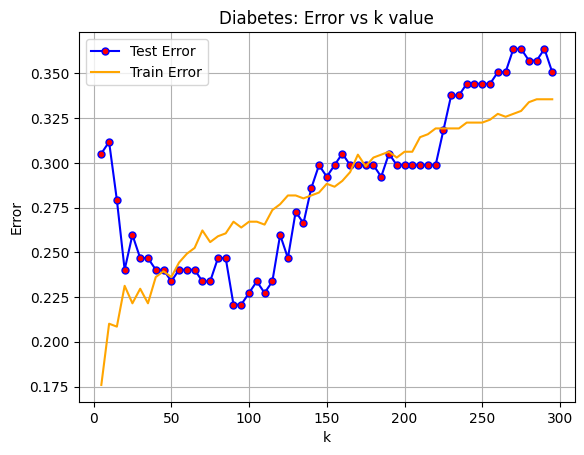

In [39]:
plt.plot([i[0] for i in test_results], [i[1] for i in test_results], color='blue', marker='o',
         markerfacecolor='red', markersize=5)

plt.plot([i[0] for i in train_results], [i[1] for i in train_results], color='orange')

plt.xlabel('k')
plt.ylabel('Error')
plt.title('Diabetes: Error vs k value')
plt.legend(['Test Error', 'Train Error'])
plt.grid(True)
plt.show()

In [40]:
#top 3 k values
optimal_k = sorted(test_results, key=lambda x: x[1])[:3]

optimal_k

[(90, 0.22077922077922074),
 (95, 0.22077922077922074),
 (100, 0.2272727272727273)]

In [9]:
#SVM

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

test_results = []
train_results = []
# SVM with 1 (Linear), 2-7 Polynomial Kernelts
for poly in range (1, 8):
  svm_poly = SVC(kernel='poly', degree=poly)
  svm_poly.fit(X_train_scaled, y_train)
  test_poly_y_pred = svm_poly.predict(X_test_scaled)
  test_results.append((poly, 1-accuracy_score(y_test, test_poly_y_pred)))

  train_poly_y_pred = svm_poly.predict(X_train_scaled)
  train_results.append((poly, 1-accuracy_score(y_train, train_poly_y_pred)))

  if poly == 1:
    print('Linear Kernel Test Loss:', 1-np.mean(test_poly_y_pred == y_test))
  else:
    print(str(poly)+'-polynomial Kernel Test Loss:', 1-np.mean(test_poly_y_pred == y_test))

#SVM with RBF kernel
svm_rbf = SVC(kernel='rbf')
svm_rbf.fit(X_train_scaled, y_train)
rbf_y_pred = svm_rbf.predict(X_test_scaled)
print('RBF Kernel Test Loss:', 1-np.mean(rbf_y_pred == y_test))
test_results.append((8, 1-np.mean(rbf_y_pred == y_test)))
train_results.append((8, 1-np.mean(svm_rbf.predict(X_train_scaled) == y_train)))


# top 3 kernel performers
svm_test_results = test_results.copy()
svm_test_results[0] = ('Linear', svm_test_results[0][1])
svm_test_results[7] = ('RBF', svm_test_results[7][1])
print('---------------------')
print('TOP 3 Optimal LOSS')
sorted(svm_test_results, key=lambda x: x[1])[:3]

Linear Kernel Test Loss: 0.23376623376623373
2-polynomial Kernel Test Loss: 0.30519480519480524
3-polynomial Kernel Test Loss: 0.2532467532467533
4-polynomial Kernel Test Loss: 0.27922077922077926
5-polynomial Kernel Test Loss: 0.2727272727272727
6-polynomial Kernel Test Loss: 0.2727272727272727
7-polynomial Kernel Test Loss: 0.27922077922077926
RBF Kernel Test Loss: 0.26623376623376627
---------------------
TOP 3 Optimal LOSS


[('Linear', 0.23376623376623373),
 (3, 0.2532467532467533),
 ('RBF', 0.26623376623376627)]

In [19]:
#Transform x back to be numerical for plotting
test_results[0] = (1, test_results[0][1])
test_results[7] = (8, test_results[7][1])

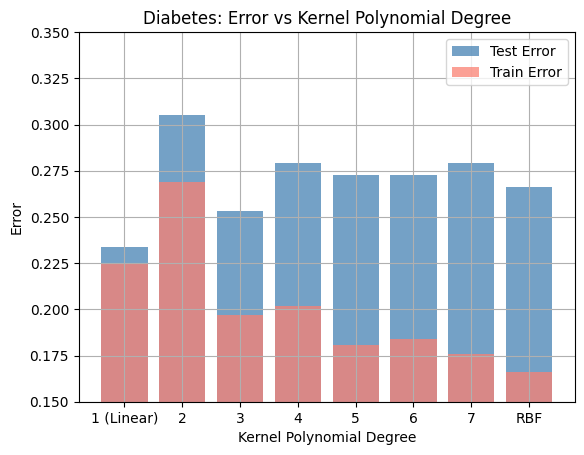

In [21]:
import matplotlib.pyplot as plt

test_poly_x = [x[0] for x in test_results]
test_poly_y = [x[1] for x in test_results]


train_poly_x = [x[0] for x in train_results]
train_poly_y = [x[1] for x in train_results]

#colors = ['seagreen' if x == 1 else 'steelblue' if 2 <= x <= 7 else 'salmon' for x in test_poly_x]

plt.bar(test_poly_x, test_poly_y, color='steelblue', alpha= 0.75)
plt.bar(train_poly_x, train_poly_y, color='salmon', alpha= 0.75)



plt.xlabel('Kernel Polynomial Degree')
plt.ylabel('Error')
plt.title('Diabetes: Error vs Kernel Polynomial Degree')
plt.grid(True)
plt.legend(['Test Error', 'Train Error'])
plt.xticks(test_poly_x, [f'1 (Linear)' if x == 1 else f'RBF' if x == 8 else str(x) for x in test_poly_x])

plt.ylim(0.15, 0.35)

plt.show()


In [22]:
# top 3 kernel performers 1 = Linear, 8 = RBF
svm_test_results = test_results
svm_test_results[0] = ('Linear', test_results[0][1])
svm_test_results[7] = ('RBF', test_results[7][1])

sorted(svm_test_results, key=lambda x: x[1])[:3]

[('Linear', 0.23376623376623373),
 (3, 0.2532467532467533),
 ('RBF', 0.26623376623376627)]

In [27]:
#NN

import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).unsqueeze(1)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).unsqueeze(1)

# 2 Hidden Layers, Input->32->16 Neurons, ReLu Hidden Activation, Sigmoid Output Activation
class NN(nn.Module):
    def __init__(self, input_size):
        super(NN, self).__init__()
        self.fc1 = nn.Linear(input_size, 32)
        self.fc2 = nn.Linear(32, 16)
        self.fc3 = nn.Linear(16, 1)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.5)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.sigmoid(self.fc3(x))
        return x

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = NN(input_size = X_train_tensor.shape[1]).to(device)
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

X_train_tensor = X_train_tensor.to(device)
y_train_tensor = y_train_tensor.to(device)
X_test_tensor = X_test_tensor.to(device)
y_test_tensor = y_test_tensor.to(device)

test_losses = []
train_losses = []

epochs = 1000
for epoch in range(epochs):
    model.train()

    y_pred = model(X_train_tensor)
    loss = criterion(y_pred, y_train_tensor)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    model.eval()
    with torch.no_grad():
        y_pred_test = model(X_test_tensor)
        test_loss = criterion(y_pred_test, y_test_tensor).item()

    if (epoch) % 500 == 0:
        print(f'Epoch {epoch}/{epochs}, BCE Train Loss: {loss.item():.4f}, BCE Test Loss: {test_loss:.4f}')
    if (epoch) % 10 == 0:
        train_losses.append((epoch, loss.item()))
        test_losses.append((epoch, test_loss))

Epoch 0/1000, BCE Train Loss: 0.7200, BCE Test Loss: 0.7111
Epoch 500/1000, BCE Train Loss: 0.3850, BCE Test Loss: 0.5763


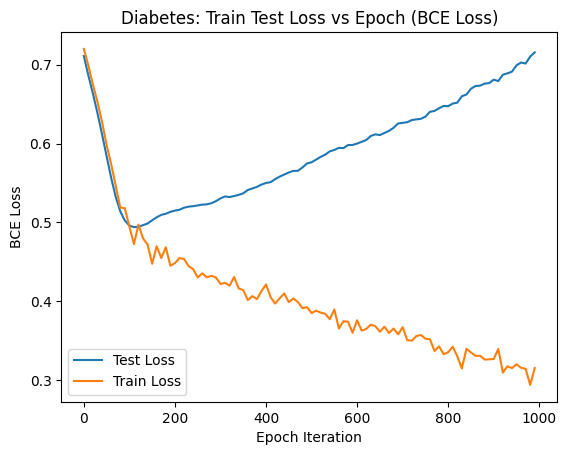

In [34]:
import matplotlib.pyplot as plt

# Extract epoch and loss values from test_losses
epochs_test = [loss[0] for loss in test_losses]
losses_test = [loss[1] for loss in test_losses]

# Extract epoch and loss values from train_losses
epochs_train = [loss[0] for loss in test_losses]
losses_train = [loss[1] for loss in train_losses]

# Plot test loss vs epoch
plt.plot(epochs_test, losses_test, label='Test Loss')

# Plot train loss vs epoch
plt.plot(epochs_train, losses_train, label='Train Loss')


plt.xlabel('Epoch Iteration')
plt.ylabel('BCE Loss')
plt.title('Diabetes: Train Test Loss vs Epoch (BCE Loss)')
plt.legend()
plt.show()


In [35]:
optimal_epoch = sorted(test_losses, key=lambda x: x[1])[0]

optimal_epoch

(110, 0.49402889609336853)

In [36]:
epochs = optimal_epoch[0]

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = NN(input_size = X_train_tensor.shape[1]).to(device)
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

for epoch in range(epochs):
    model.train()

    y_pred = model(X_train_tensor)
    loss = criterion(y_pred, y_train_tensor)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    model.eval()
    with torch.no_grad():
        y_pred_test = model(X_test_tensor)
        test_loss = criterion(y_pred_test, y_test_tensor).item()
        if (epoch) == epochs - 1:
            print(f'Epoch {epoch + 1}, BCE Train Loss: {loss.item():.4f}, BCE Test Loss: {test_loss:.4f}')


# Final evaluation on test set
model.eval()
with torch.no_grad():
    y_pred_test = model(X_test_tensor)
    y_pred_test_class = (y_pred_test > 0.5).float()
    loss = 1-(y_pred_test_class.eq(y_test_tensor).sum() / float(y_test_tensor.shape[0])).item()
    print(f'Epoch @ {epochs} Classification Loss: {loss}')

Epoch 110, BCE Train Loss: 0.4858, BCE Test Loss: 0.5040
Epoch @ 110 Classification Loss: 0.2142857313156128
